In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd


In [65]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df = pd.read_csv('Global Protest Tracker - View Data.csv')

# Print the column names and their data types
print(df.head())

      Country                                      Protest Name Start Date  \
0     Ecuador                 Protest for "Guayaquil Four" boys     24-Dec   
1       Kenya  Protest against abductions of government critics     24-Dec   
2  Bangladesh                                   March for Unity     24-Dec   
3     Türkiye                              Minimum wage protest     24-Dec   
4       Syria                     Protest for religious freedom     24-Dec   

  Freedom Rating (Status)                                           Triggers  \
0             Partly Free  Four teenage boys (the "Guayaquil Four") disap...   
1             Partly Free  The Kenya National Commission on Human Rights ...   
2             Partly Free  The Anti-Discrimination Student Movement organ...   
3                Not Free  The Turkish government raised the monthly mini...   
4                Not Free  A video posted on social media showed masked i...   

                                         Motivatio

In [66]:
# Remove rows with invalid date format
df = df[pd.to_datetime(df['Start Date'], format='%d-%b', errors='coerce').notna()]

# Modifying Peak Size for estimates to actual numbers
df['Peak Size'] = df['Peak Size'].astype(str).str.replace(' ', '', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('>', '', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('<', '', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace(',', '')
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('.', '', regex=False)


df['Peak Size'] = df['Peak Size'].astype(str).str.replace('million', '000000', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('Thousands', '2000', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('Hundreds', '200', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('100s', '200', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('Unknown', '', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('NaN', '', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('nan', '', regex=False)
df['Peak Size'] = df['Peak Size'].astype(str).str.replace('Tensofthousands', '20000', regex=False)

df['Peak Size'] = pd.to_numeric(df['Peak Size'])

In [67]:
# Removing any rows that have seemingly too high of Peak Size

df = df[df['Peak Size'] < 1e7]
df.head()

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Gender motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city
0,Ecuador,"Protest for ""Guayaquil Four"" boys",24-Dec,Partly Free,"Four teenage boys (the ""Guayaquil Four"") disap...",Demand justice for missing boys. Express anger...,100.0,"General public, families of missing boys",Active,The nationwide protests pushed authorities to ...,X,NaN,X,NaN,NaN,Hundreds,NaN,NaN,NaN,NaN,NaN,Quito
1,Kenya,Protest against abductions of government critics,24-Dec,Partly Free,The Kenya National Commission on Human Rights ...,Denounce the extrajudicial arrests. Demand tha...,100.0,"Human rights groups, youth",1 day,No policy/leadership change. Though President ...,NaN,NaN,X,NaN,NaN,Hundreds,NaN,NaN,NaN,NaN,NaN,Nairobi
2,Bangladesh,March for Unity,24-Dec,Partly Free,The Anti-Discrimination Student Movement organ...,Call for prosecution of Hasina and others resp...,1000.0,Anti-Discrimination Student Movement (student ...,1 day,No policy/leadership change. The interim gover...,NaN,NaN,X,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Dhaka
3,Türkiye,Minimum wage protest,24-Dec,Not Free,The Turkish government raised the monthly mini...,Demand greater increase in minimum wage. Frust...,1000.0,"General public, workers",1 day,No policy/leadership change.,NaN,X,NaN,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Ankara
4,Syria,Protest for religious freedom,24-Dec,Not Free,A video posted on social media showed masked i...,Express anger over burning of the Christmas tr...,100.0,Christians,1 day,No policy/leadership change.,NaN,NaN,X,NaN,NaN,Hundreds,NaN,NaN,NaN,NaN,NaN,Damascus


In [68]:
df.shape

(743, 22)

In [69]:
df["Peak Size"].sort_values()

114         10.0
212         10.0
356         10.0
152         10.0
253         10.0
36          10.0
6          100.0
0          100.0
68         100.0
47         100.0
48         100.0
57         100.0
531        100.0
18         100.0
19         100.0
1          100.0
76         100.0
77         100.0
79         100.0
502        100.0
75         100.0
74         100.0
72         100.0
497        100.0
604        100.0
458        100.0
455        100.0
447        100.0
468        100.0
484        100.0
43         100.0
4          100.0
133        100.0
132        100.0
404        100.0
407        100.0
412        100.0
416        100.0
417        100.0
460        100.0
115        100.0
117        100.0
119        100.0
120        100.0
427        100.0
419        100.0
401        100.0
433        100.0
134        100.0
122        100.0
158        100.0
148        100.0
376        100.0
379        100.0
145        100.0
383        100.0
386        100.0
375        100.0
374        100

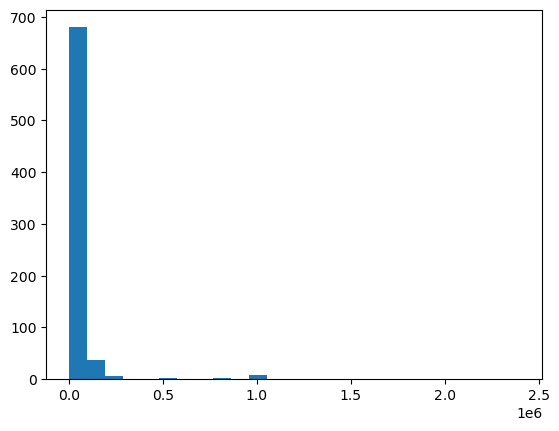

In [70]:
# Create histograms
hist, bins, _ = plt.hist(df["Peak Size"].values, bins=25)

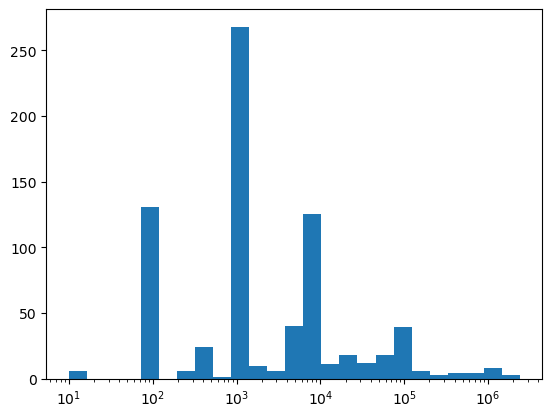

In [71]:
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(df["Peak Size"], bins=logbins)
plt.xscale('log')
plt.show()

In [72]:
df[df["Peak Size"]>1000000.0]

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Gender motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city
138,Germany,Anti-AfD protest,24-Jan,Free,Reports that a group of officials from the Alt...,Denounce the AfD and Nazism.,2400000.0,General public,6 months; 1 week in August 2024,No policy/leadership change in response to the...,NaN,NaN,X,NaN,NaN,Millions,NaN,X,NaN,X,NaN,Berlin
683,Bolivia,Wildfire protests,19-Oct,Partly free,Then president Evo Morales’s refusal to declar...,Morales’ environmental policies and growing po...,1500000.0,General public.,1 week,No policy/leadership change in response to the...,NaN,NaN,X,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,X,La Paz
738,Hong Kong,Hong Kong autonomy protests,19-Apr,Partly free,"In 2019, introduction of a bill that would per...","Erosion of Hong Kong’s one country, two system...",2000000.0,"General public, especially younger citizens an...","1 year, 4 months (sporadic)",The Hong Kong government retracted the extradi...,NaN,NaN,X,NaN,NaN,Thousands,X,NaN,NaN,NaN,NaN,Hong Kong


In [73]:
def convert_custom_date_format(df, date_column='Start Date', new_column='datetime'):
    """
    Converts dates in 'YY-Mon-DD' format to datetime objects.

    Args:
        df (pd.DataFrame): The DataFrame containing the date column.
        date_column (str): The name of the date column.
        new_column (str): The name of the new datetime column.

    Returns:
        pd.DataFrame: The DataFrame with the new datetime column.
    """
    new_dates = []
    for date_str in df[date_column]:
        year, month = date_str.split('-')
        month = month[:3].lower()
        new_date_str = '20' + year + '-' + month
        new_dates.append(new_date_str)

    df[new_column] = pd.to_datetime(new_dates, format='%Y-%b')
    return df

In [74]:
df = convert_custom_date_format(df)
df.sample(5)

,Country,Protest Name,Start Date,Freedom Rating (Status),Triggers,Motivations,Peak Size,Key Participants,Duration,Outcomes,Active protests,Economic motivation?,Political motivation?,Corruption motivation?,Gender motivation?,Size category,Protests with a significant outcome,"Large protests (Over 100,000 protesting)",Violent government response,Long protests (more than 3 months),Coronavirus-related protests,Capital city,datetime
13,South Korea,Martial law protests,24-Dec,Free,"On the night of December 3, President Yoon Suk...",Express anger over Yoon's declaration of marti...,100000.0,"General public, opposition",Active,"On December 4, only a few hours after Yoon's a...",X,NaN,X,NaN,NaN,Hundreds of thousands,X,X,NaN,NaN,NaN,Seoul,2024-12-01
480,Azerbaijan,Lachin corridor blockade protests,22-Dec,Not free,Dozens of Azerbaijanis blocked the Lachin corr...,Perceptions that the Azerbaijani government wa...,6000.0,Residents of Nagorno-Karabakh,9 months,"On September 19, Azerbaijan launched a militar...",NaN,NaN,X,NaN,NaN,Thousands,NaN,NaN,NaN,X,NaN,Baku,2022-12-01
597,Indonesia,Jobs bill protests,20-Oct,Partly free,"Enactment of an omnibus Jobs Creation Bill, wh...",Concern that reforms would weaken protections ...,1000.0,General public.,1 month,No policy or leadership change in response to ...,NaN,X,X,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Jakarta,2020-10-01
2,Bangladesh,March for Unity,24-Dec,Partly Free,The Anti-Discrimination Student Movement organ...,Call for prosecution of Hasina and others resp...,1000.0,Anti-Discrimination Student Movement (student ...,1 day,No policy/leadership change. The interim gover...,NaN,NaN,X,NaN,NaN,Thousands,NaN,NaN,NaN,NaN,NaN,Dhaka,2024-12-01
264,Republic of Ireland,Dublin stabbing riots,23-Nov,Free,Three children and a woman were stabbed outsid...,Stand against crime and in defense of Irish ch...,100.0,"Far-right activists, especially oppone.nts of ...",1 day,The taoiseach condemned the riots and pledged ...,NaN,NaN,X,NaN,NaN,Hundreds,NaN,NaN,NaN,NaN,NaN,Dublin,2023-11-01


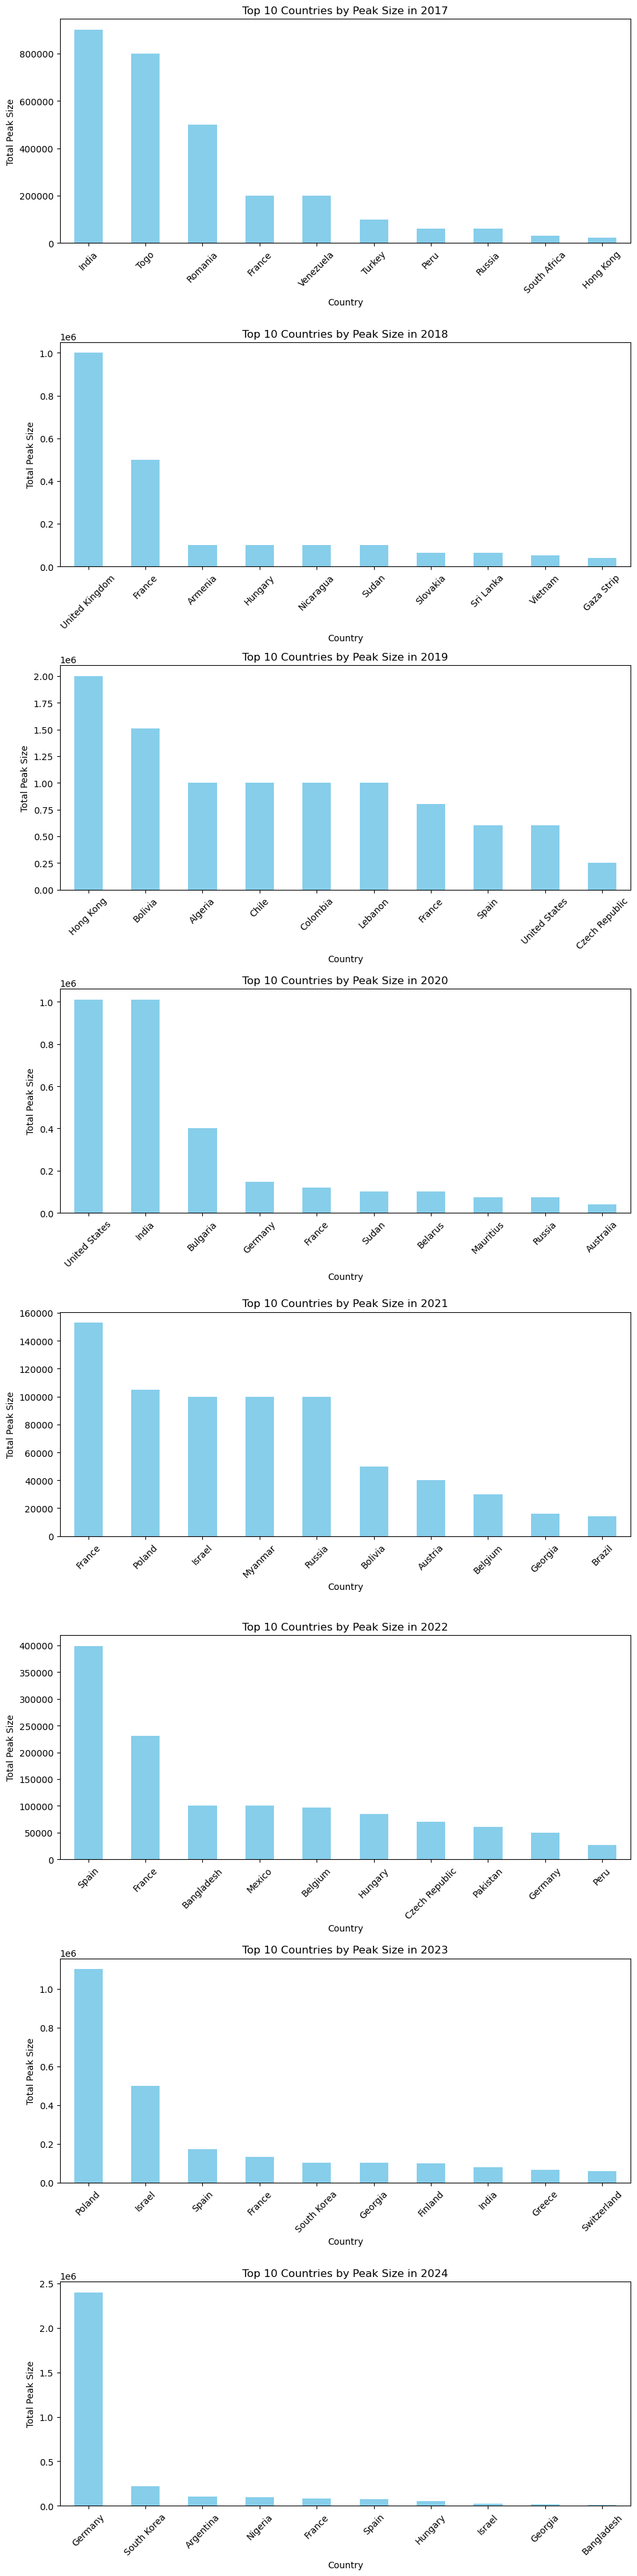

In [75]:
grouped_df = df.groupby([df['datetime'].dt.year, 'Country'])['Peak Size'].sum().reset_index()

# Plot top 10 countries for each year
fig, axes = plt.subplots(nrows=len(grouped_df['datetime'].unique()), figsize=(10, 5 * len(grouped_df['datetime'].unique())))

for i, year in enumerate(sorted(grouped_df['datetime'].unique())):
    # Filter data for the given year
    yearly_data = grouped_df[grouped_df['datetime'] == year].nlargest(10, 'Peak Size')
    
    # Create subplot for each year
    ax = axes[i] if len(grouped_df['datetime'].unique()) > 1 else axes
    yearly_data.plot(kind='bar', x='Country', y='Peak Size', ax=ax, legend=False, color='skyblue')
    
    ax.set_title(f"Top 10 Countries by Peak Size in {year}")
    ax.set_xlabel("Country")
    ax.set_ylabel("Total Peak Size")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [76]:
df['datetime'] = pd.to_datetime(df['Start Date'], format='%y-%b')

### Use the mmALL dataset instead, because the Global Protest only has datest from 17-24

In [77]:
df_old = pd.read_csv("mmALL_073120_csv.csv")

df_old.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist parti quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,mohawk indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...


In [78]:
# Modify participants numbers to remove the ambiguity

df_old['participants'] =df_old['participants'].astype(str).str.replace(' ', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('nan', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('""', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace(',', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('.', '', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('>', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('<', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('+', '', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('100s', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000s', '1000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('100+', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('thousands', '2000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('10000s', '20000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('hundreds', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('tensof1000', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Thousands', '2000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('90000+', '100000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('dozens', '24', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('Atleast10,000', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('40000-80000', '80000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('tensof2000', '20000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('100,000s', '200000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('verylow2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000-3000', '2500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Asmanyas25,000protesters', '25000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('morethan25000', '25000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About500people', '500', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('400-600', '500', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('200-400', '300', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('25000-200000', '200000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Around200protesters', '200', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About30000', '200', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('Atleast100', '100', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofcollegestudents', '200', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Nearly700000', '70000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About30000', '30000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500people', '500', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('100-1500', '1500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About300people', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50000-100000', '100000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('over100arrested', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About80', '80', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('between35000and50000', '50000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Almost200', '200', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Some500', '500', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('SOME3000people', '3000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan4000people', '4000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Marchorganiserandlegal-sectorlawmakerDennisKwoksaidmorethan2000peoplejoinedtheprotestPoliceputtheturnoutat1700', 
                                                                       '1700', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('200-3000', '3000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('97publicorganisations', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200-2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('75000-170000', '170000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About100activistsincluding39suspectswhoweresummonedand66moresuspectswhowouldbesummonedtofacechargeslater', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1800participants', '1800', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About12000protesters', '12000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Upto100000', '100000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan10000protesters', '100000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About100villagers', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan10000citizens', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Almost350000', '350000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('65000people', '65000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('Over200localprotesters', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan500000people', '500000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About150protesters', '150', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('5000members', '5000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('3000-10000', '10000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('100000s-3000000', '3000000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('20000s', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300-400', '400', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100000s-3000000', '3000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1300-2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50000-80000', '80000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Between11000and45000', '45000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('3000-6000', '6000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('30000-40000', '40000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan30000', '30000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('morethan100', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About7000', '7000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Upto300people', '300', regex=False)




df_old['participants'] =df_old['participants'].astype(str).str.replace('3000-5000', '5000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000-23000', '23000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-1000', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan200campaigners', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-600', '600', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Around300localpeople', '300', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About6000people', '6000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofstudentprotesters', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50000-120000', '120000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('InnorthernChiangMaiprovince200kamsandvillageheads;inPhetchaburiabout400kamsandvillageheads', '400', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About50protesters', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('30arrested', '30', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('about150', '150', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('ProtestsacrossIndia', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofresidents', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('busloads', '400', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('morethan500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('about300', '300', regex=False)



df_old['participants'] =df_old['participants'].astype(str).str.replace('around50', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Civilians;acrowd', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('about2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300-1000', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Widespreadproteststhroughoutthevalley', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1100-20000', '20000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('widespread', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Civilians;acrowd', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('230families', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-700', '700', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Severalhundred', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-2000', '2000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('6000-7000', '7000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('morethan1500detained', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50s', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-700', '700', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000ofIndiansincludingBollywoodactors', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Volunteersandalineformedofpeopleparticipatingtocookbeefandshareitwithstrangersinthestreets', '', regex=False)




df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan300people', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50-1000', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Some100demonstrators', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About5000people', '5000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('13000people', '13000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About50', '50', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Nearly70parents', '70', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Over2000constructionworkers', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About4000people', '4000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('between7500-25000', '25000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('TheCivilHumanRightsFrontsaid110000people;TheHongKongpolicesaid20000', '110000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000to4000people', '4000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('scores(50)', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Some250residents', '250', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofvillagers', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About100taxis', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50activists', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('ABOUT130members', '130', regex=False)



df_old['participants'] =df_old['participants'].astype(str).str.replace('20000-30000', '30000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan1000teachers', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofvillagers', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('atleast160000', '160000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000ofminers', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Over3000', '3000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Theorganiserssaidmorethan3000people;policesaidtheturnoutwas830atitspeak', '3000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500demonstrators', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Estimatedtobe15500', '15500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('10s', '20', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('250-300', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('morethan200', '200', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('Estimatednumberofprotestersat10000', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofworkers', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('5000-10000', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('atleast160000', '160000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About4000', '4000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Estimated6000drivers', '6000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('About10000', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100-500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('12arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan1000', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300s', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Around5000', '5000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('10000people', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Nearly500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200demonstrators', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('80-100', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('agroup', '', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('About300protesters', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000-200000', '200000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('8000-9000', '9000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('4000arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500000-700000', '700000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('10000people', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100-1000', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('3000-4000', '4000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About400', '400', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('severalhundred', '200', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('btw20000&30000', '30000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About120', '120', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50_', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About300', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About130', '130', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100wounded', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100000-200000', '200000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('20000-60000', '60000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('3000-4500', '4500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100-20000', '20000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('5000-50000', '50000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100000s', '200000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('severaldozen', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Tensof2000', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200of2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('164arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000-10000', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000000s', '2000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50arrests', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('severalthousand', '2000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('morethan400arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsof2000', '200000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('20arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Severalthousandprotesters', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Demonstrators', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Largedemonstrations', '10000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Massprotests', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hugeprotests', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Severalthousand', '2000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('700-1000', '1000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace("Protestersonwhomthegovernmentsecurityforcesusedwatercannonsrubberbulletsandbatons", '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Afewhundredpeople', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Aboutahundredprotesters', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('HundredsofVenezuelans', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('AgeneralstrikethatparalysedVenezuela', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofyouths', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Millions', '2000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethansevenmillionpeople', '7000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('""', '', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('16killed', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace("overamillion", '1000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('afewdozen', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('afewthousand', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('25protestersinjured', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('AgeneralstrikethatparalysedVenezuela', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundredsofyouths', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Millions', '2000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethansevenmillionpeople', '7000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('""', '', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('1000000s', '1000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('HUNDREDSOF2000ofVenezuelans', '100000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Rockedbyprotests', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000to1.4million', '1400000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000to14million', '1400000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('scores', '', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('morethana24chools', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('several1000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('increasinglylargegatherings', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('24arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Massdemonstrations', '', regex=False)



df_old['participants'] =df_old['participants'].astype(str).str.replace('several200', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About100', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Hundreds', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200-300', '300', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('150-300', '300', regex=False)



df_old['participants'] =df_old['participants'].astype(str).str.replace('4000-12000', '12000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('260-500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Dozens', '40', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('several24', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('nearly10000', '10000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('afew200', '400', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('millions', '1000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('28LGBTgroups', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('20000-40000', '40000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('teachersandpupils', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('fewthousand', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000S', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('7000-15000', '15000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('250000-350000', '350000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Over100', '100', regex=False)



df_old['participants'] =df_old['participants'].astype(str).str.replace('1million', '1000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('uptotwomillion', '2000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500supporters', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('between100000&300000', '300000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('6000to8000', '8000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('3000to5000', '5000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('couple2000', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300-350', '350', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Some100residents', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000-40000', '40000', regex=False)




df_old['participants'] =df_old['participants'].astype(str).str.replace('57formerestateworkers', '57', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50000-70000', '70000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('atleast500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Some50members', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('about100', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('600-700', '700', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('6000-8000', '8000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300-350', '350', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200arrested', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('about8000', '8000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace("350-400", '400', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace("60-70", '70', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('7000-9000', '9000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('150-200', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200000-400000', '400000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About200people', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('6000-8000', '8000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000ofpeople', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200ofpeople', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Morethan100people', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('3500-5000', '5000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace("20000ofpeople", '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace("Afewhundred", '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('afewhundred', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000to3000', '3000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000-20000', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About200people', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('6000-8000', '8000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('35000-70000', '70000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('200ofpeople', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('2000people', '2000', regex=False)


df_old['participants'] =df_old['participants'].astype(str).str.replace('20,000ofpeople', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('20,000ofpeople', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('600-3000', '3000', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace("50arrested", '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace("100people", '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50-100', '100', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-1,200', '1200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('fewdozen', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('400-500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('About200', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50people', '50', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300-500', '500', regex=False)



df_old['participants'] =df_old['participants'].astype(str).str.replace('""', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace(',', '', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('.', '', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('2000ofpeople', '2000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('20000ofpeople', '20000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('500-1200', '1200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('1000000s', '1000000', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('800-900', '900', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('300-500', '500', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50-99', '90', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('50-60', '60', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('100S', '200', regex=False)
df_old['participants'] =df_old['participants'].astype(str).str.replace('Crowds', '', regex=False)

df_old['participants'] =df_old['participants'].astype(str).str.replace('100activistsincluding39suspectswhoweresummonedand66moresuspectswhowouldbesummonedtofacechargeslater', '100', regex=False)
df_old['participants'] = df_old['participants'].astype(str).str.replace('Asmanyas25000protesters', '25000', regex=False)


df_old['participants'] = pd.to_numeric(df_old['participants'])

In [79]:
df_old = df_old[df_old["participants"]>0]
df_old.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes'],
      dtype='object')

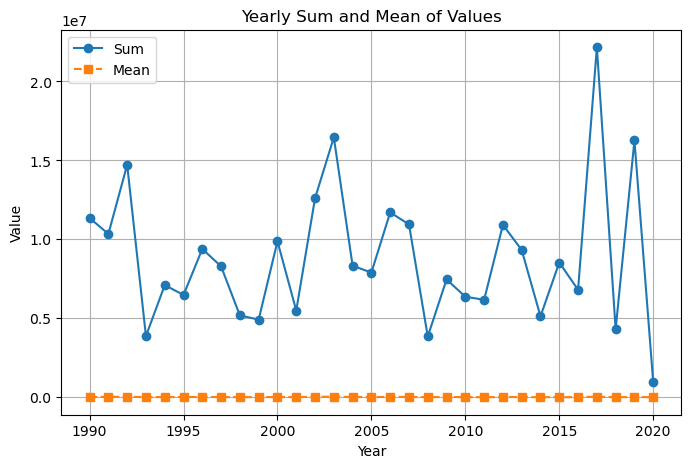

In [80]:
grouped_old_sum = df_old.groupby(df_old['year'])['participants'].sum()  # Aggregating by sum
grouped_old_mean = df_old.groupby(df_old['year'])['participants'].mean() 



plt.figure(figsize=(8, 5))

plt.plot(grouped_old_sum.index, grouped_old_sum.values, marker='o', linestyle='-', label='Sum')
plt.plot(grouped_old_mean.index, grouped_old_mean.values, marker='s', linestyle='--', label='Mean')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Yearly Sum and Mean of Values')
plt.legend()
plt.grid(True)

plt.show()

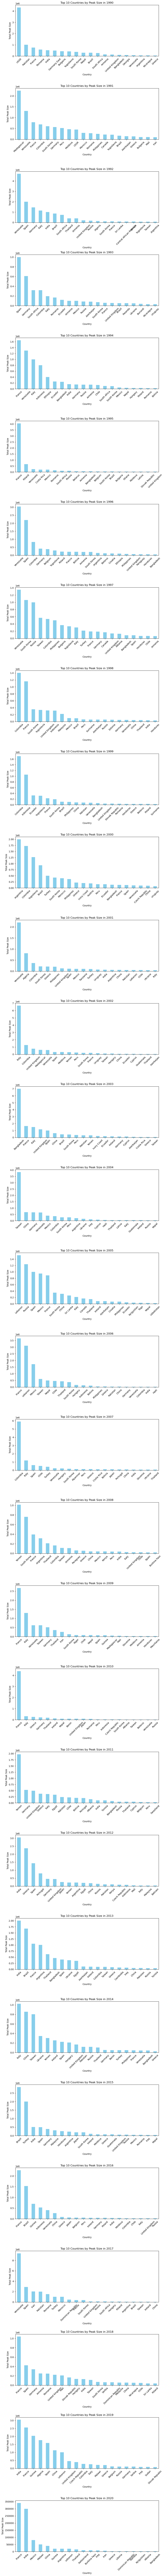

In [81]:
grouped_df_old = df_old.groupby([df_old['year'], 'country'])['participants'].sum().reset_index()

# Plot top 10 countries for each year
fig, axes = plt.subplots(nrows=len(grouped_df_old['year'].unique()), figsize=(10, 5 * len(grouped_df_old['year'].unique())))

for i, year in enumerate(sorted(grouped_df_old['year'].unique())):
    # Filter data for the given year
    yearly_data = grouped_df_old[grouped_df_old['year'] == year].nlargest(20, 'participants')
    
    # Create subplot for each year
    ax = axes[i] if len(grouped_df_old['year'].unique()) > 1 else axes
    yearly_data.plot(kind='bar', x='country', y='participants', ax=ax, legend=False, color='skyblue')
    
    ax.set_title(f"Top 10 Countries by Peak Size in {year}")
    ax.set_xlabel("Country")
    ax.set_ylabel("Total Peak Size")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [82]:
df_old['startdate'] = pd.to_datetime(
    df_old[['startyear', 'startmonth', 'startday']].rename(columns={
        'startyear': 'year',
        'startmonth': 'month',
        'startday': 'day'
    })
)

df_old['enddate'] = pd.to_datetime(
    df_old[['endyear', 'endmonth', 'endday']].rename(columns={
        'endyear': 'year',
        'endmonth': 'month',
        'endday': 'day'
    })
)

df_old['duration_days'] = (df_old['enddate'] - df_old['startdate']).dt.days

df_old.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,startdate,enddate,duration_days
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000.0,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,1990-01-15,1990-01-15,0
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000.0,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,1990-06-25,1990-06-25,0
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500.0,separatist parti quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",1990-07-01,1990-07-01,0
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100.0,mohawk indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,1990-07-12,1990-09-06,56
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950.0,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,1990-08-14,1990-08-15,1


In [83]:
temp_df_old = df_old[["country","year","participants", "startdate", "enddate", "duration_days"]]


In [84]:
# put yearly protest data in a dataframe 
df_protest = temp_df_old.groupby(["country", "year"])["participants"].sum().reset_index()

In [85]:
# create number of events column
temp_df_old['val'] = 1
num_events= temp_df_old.groupby(['country', 'year'])['val'].sum().reset_index()
df_protest['number_events'] = num_events['val']

/tmp/ipykernel_62544/3055424247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df_old['val'] = 1


In [86]:
df_protest.head(5)

,country,year,participants,number_events
0,Afghanistan,1991,2000.0,1
1,Afghanistan,1997,2000.0,1
2,Afghanistan,1998,2000.0,1
3,Afghanistan,2002,200.0,1
4,Afghanistan,2005,400.0,2


In [87]:
#import world population data according years
df_population = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_26346.csv', skiprows=4)
df_population = df_population.drop(columns=['Indicator Name', 'Indicator Code', 'Unnamed: 68'])
df_population_melted = df_population.melt(id_vars=['Country Name', 'Country Code'], var_name='year', value_name='population')
df_population_melted = df_population_melted.drop(columns = ["Country Code"])
df_population_melted['year'] = pd.to_numeric(df_population_melted['year'])
df_population_melted.head()

,Country Name,year,population
0,Aruba,1960,54922.0
1,Africa Eastern and Southern,1960,130072080.0
2,Afghanistan,1960,9035043.0
3,Africa Western and Central,1960,97630925.0
4,Angola,1960,5231654.0


In [95]:
df_population_melted = df_population_melted.rename(columns={'Country Name': 'country'})

df_population_melted.head()

,country,year,population
0,Aruba,1960,54922.0
1,Africa Eastern and Southern,1960,130072080.0
2,Afghanistan,1960,9035043.0
3,Africa Western and Central,1960,97630925.0
4,Angola,1960,5231654.0


In [115]:
min_year = int(df_protest['year'].min())
max_year = int(df_protest['year'].max())
all_years = set(list(range(min_year, max_year+1)))

missing_df = pd.DataFrame()
for country in ['Afghanistan']:# df_protest['country'].unique():
    curr_years = set(df_protest[df_protest['country']==country].year.to_list())
    missing_years = all_years.difference(curr_years)
    n = len(missing_years)
    to_add = pd.DataFrame({'country': n*[country],
                           'year':list(missing_years),
                           'participants':n*[0],
                           'number_events':n*[0]})
    missing_df = pd.concat([missing_df, to_add])

df_protest = pd.concat([df_protest, missing_df])
df_protest.sort_values(by=['country','year'], inplace=True)
df_protest['year'] = df_protest['year'].astype(int)
df_protest['participants'] = df_protest['participants'].astype(int)
df_protest['number_events'] = df_protest['number_events'].astype(int)
df_protest.head(15)

,country,year,participants,number_events
1,Afghanistan,1990,0,0
0,Afghanistan,1991,2000,1
2,Afghanistan,1992,0,0
3,Afghanistan,1993,0,0
4,Afghanistan,1994,0,0
5,Afghanistan,1995,0,0
6,Afghanistan,1996,0,0
1,Afghanistan,1997,2000,1
2,Afghanistan,1998,2000,1
7,Afghanistan,1999,0,0


In [ ]:
df_joined = pd.merge(df_population_melted, df_protest, on=['country', 'year'], how='inner')
df_joined.sort_values(by=['country','year'], inplace=True)
df_joined.reset_index(inplace=True)
df_joined.drop(columns=['index'], inplace=True)
df_joined['yprotest'] = (df_joined['number_events']>0)*1
df_joined.head()

,country,year,population,participants,number_events,yprotest
0,Afghanistan,1990,12045660.0,0,0,0
1,Afghanistan,1991,12238879.0,2000,1,1
2,Afghanistan,1992,13278974.0,0,0,0
3,Afghanistan,1993,14943172.0,0,0,0
4,Afghanistan,1994,16250794.0,0,0,0


In [126]:

df_joined["protest_fraction"] = df_joined["participants"]/df_joined["population"]
df_joined.head()

df_joined.to_csv("yearly_protest_data.csv")